In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#это мне всё, конечно же, понадобится

In [2]:
X_test = pd.read_parquet('/kaggle/input/x-test/X_test.parquet', engine = 'auto')

In [3]:
X_test

,ЭКСГАУСТЕР 4. ТОК РОТОРА 1,ЭКСГАУСТЕР 4. ТОК РОТОРА2,ЭКСГАУСТЕР 4. ТОК СТАТОРА,ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ,ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1,ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2,ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3,ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4,ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ,ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ,...,ЭКСГАУСТЕР 9. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3,ЭКСГАУСТЕР 9. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4,ЭКСГАУСТЕР 9. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ,ЭКСГАУСТЕР 9. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ,ЭКСГАУСТЕР 9. ВИБРАЦИЯ НА ОПОРЕ 1,ЭКСГАУСТЕР 9. ВИБРАЦИЯ НА ОПОРЕ 2,ЭКСГАУСТЕР 9. ВИБРАЦИЯ НА ОПОРЕ 3,ЭКСГАУСТЕР 9. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.,ЭКСГАУСТЕР 9. ВИБРАЦИЯ НА ОПОРЕ 4,ЭКСГАУСТЕР 9. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ.
DT,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,247.51,247.51,271.61,134.49,NaN,43.81,NaN,34.07,NaN,NaN,...,NaN,NaN,NaN,34.88,1.02,2.36,1.35,2.25,0.72,3.52
2022-01-01 00:00:10,NaN,NaN,272.14,NaN,43.00,43.00,30.83,34.88,NaN,NaN,...,35.70,NaN,25.96,33.26,1.12,2.34,1.44,2.50,0.69,3.57
2022-01-01 00:00:20,247.71,247.71,268.66,134.72,NaN,NaN,NaN,34.07,NaN,NaN,...,36.51,59.22,24.34,34.88,1.01,2.26,1.34,2.05,0.62,3.85
2022-01-01 00:00:30,NaN,NaN,272.14,134.26,NaN,NaN,NaN,34.88,NaN,NaN,...,NaN,56.79,25.96,35.70,0.95,2.37,1.46,2.12,0.60,2.59
2022-01-01 00:00:40,247.31,247.31,270.49,134.49,NaN,NaN,NaN,NaN,30.83,NaN,...,NaN,NaN,25.15,33.26,1.02,2.34,1.35,2.05,0.56,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-09 23:59:20,246.90,246.90,269.44,105.90,43.00,38.94,31.64,NaN,26.77,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-09 23:59:30,NaN,NaN,266.93,105.79,42.19,40.56,30.83,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-09 23:59:40,247.11,247.11,270.40,105.90,43.00,41.37,NaN,34.07,25.15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for col in X_test.columns:
    while "  " in col:
        X_test = X_test.rename(columns={col:col.replace("  ", " ")})
    if ".ПРОДОЛЬНАЯ" in col:
        X_test = X_test.rename(columns={col:col.replace(".ПРОДОЛЬНАЯ", ". ПРОДОЛЬНАЯ")})
    if "ТОК РОТОРА2" in col:
        X_test = X_test.rename(columns={col:col.replace("ТОК РОТОРА2", "ТОК РОТОРА 2")})
    if "." == col[-1]:
        X_test = X_test.rename(columns={col:col.strip(".")})
X_test = X_test.dropna()

In [5]:
for col in X_test.columns:
    print(col)

ЭКСГАУСТЕР 4. ТОК РОТОРА 1
ЭКСГАУСТЕР 4. ТОК РОТОРА 2
ЭКСГАУСТЕР 4. ТОК СТАТОРА
ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 1
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 2
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ
ЭКСГАУСТЕР 5. ТОК РОТОРА 1
ЭКСГАУСТЕР 5. ТОК РОТОРА 2
ЭКСГАУСТЕР 5. ТОК СТАТОРА
ЭКСГАУСТЕР 5. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ
ЭКСГАУСТЕР 5. ТЕМПЕРА

In [6]:
dict1 = dict()
dict2 = dict()
columns = []
index = []
for col in X_test.columns:
    tokenized = col.split(".")
    columns.append(tokenized[0])
    second_token = ""
    for token in tokenized[1:]:
        second_token += token.strip(" ")+". "
    second_token = second_token.strip(". ").strip(" ")
    index.append(second_token)
index = set(index)
matrix = pd.DataFrame(index)
matrix = matrix.rename(columns={0:"index"})
for col in columns:
    matrix[col] = pd.Series(np.array([0]*len(index)))
matrix = matrix.set_index("index")
for col in X_test.columns:
    tokenized = col.split(". ")
    columns.append(tokenized[0])
    second_token = ""
    for token in tokenized[1:]:
        second_token += token+". "
    second_token = second_token.strip(". ").strip(" ")
    matrix.loc[second_token,tokenized[0]] = 1
matrix

,ЭКСГАУСТЕР 4,ЭКСГАУСТЕР 5,ЭКСГАУСТЕР 6,ЭКСГАУСТЕР 7,ЭКСГАУСТЕР 8,ЭКСГАУСТЕР 9
index,,,,,,
ТОК СТАТОРА,1,1,1,1,1,1
ВИБРАЦИЯ НА ОПОРЕ 2,1,1,1,1,1,1
ВИБРАЦИЯ НА ОПОРЕ 4,1,1,1,1,1,1
ВИБРАЦИЯ НА ОПОРЕ 3,1,1,1,1,1,1
ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ,1,1,1,1,1,1
ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1,1,1,1,1,1,1
ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ,1,1,1,1,1,1
ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3,1,1,1,1,1,1
ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4,1,1,1,1,1,1


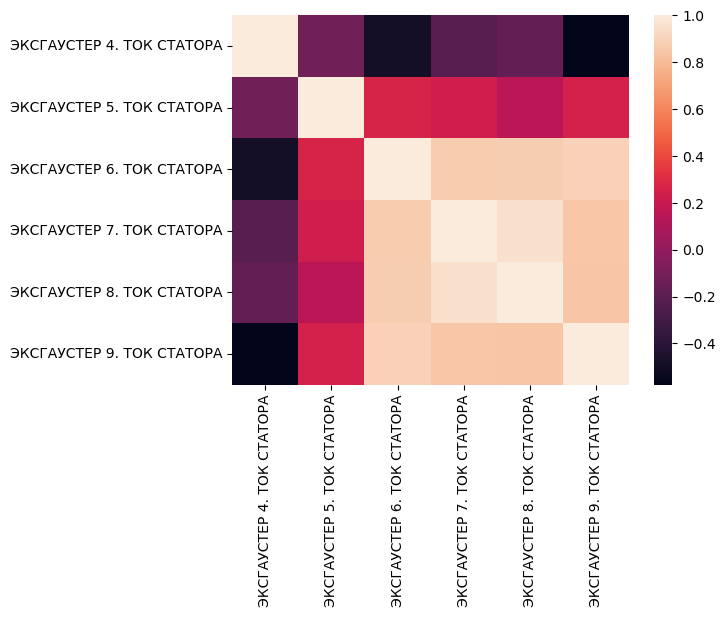

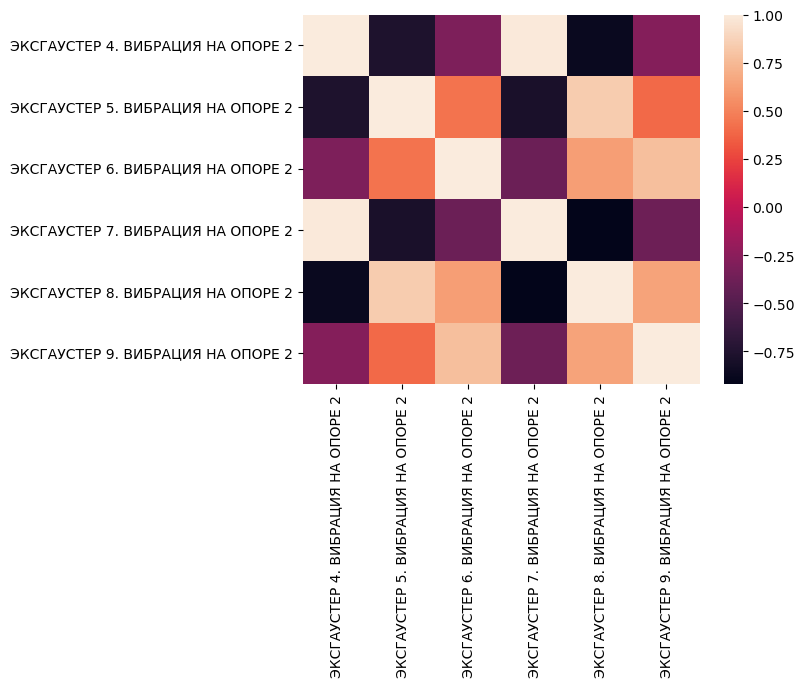

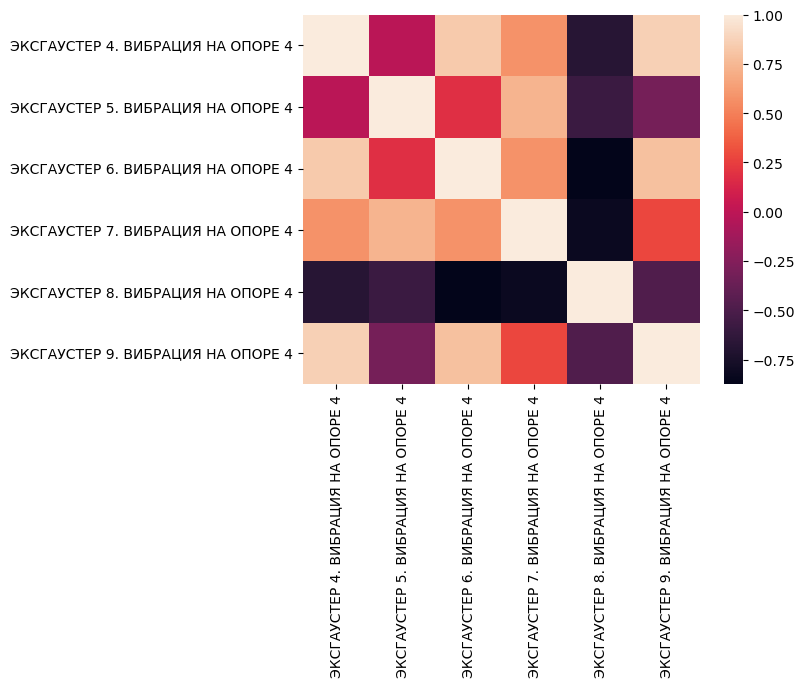

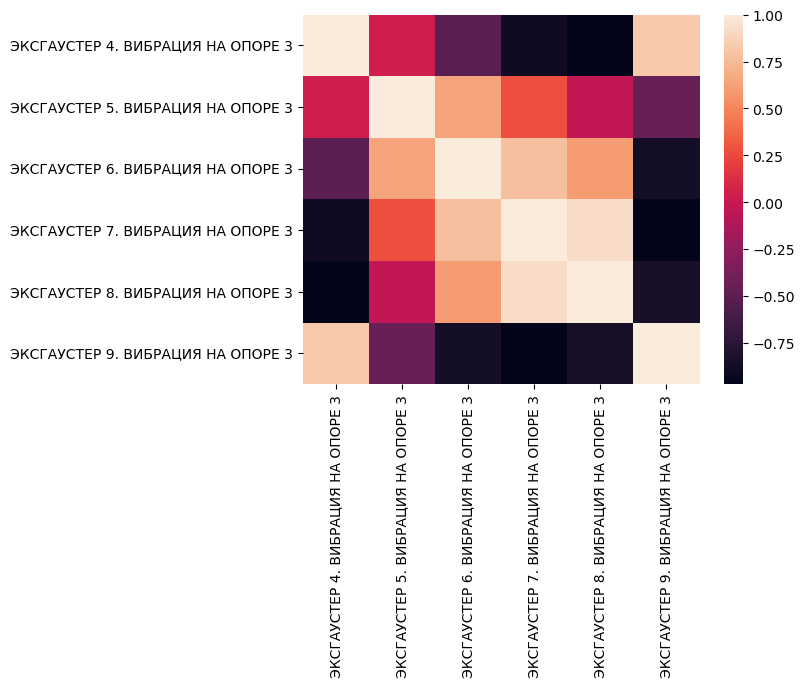

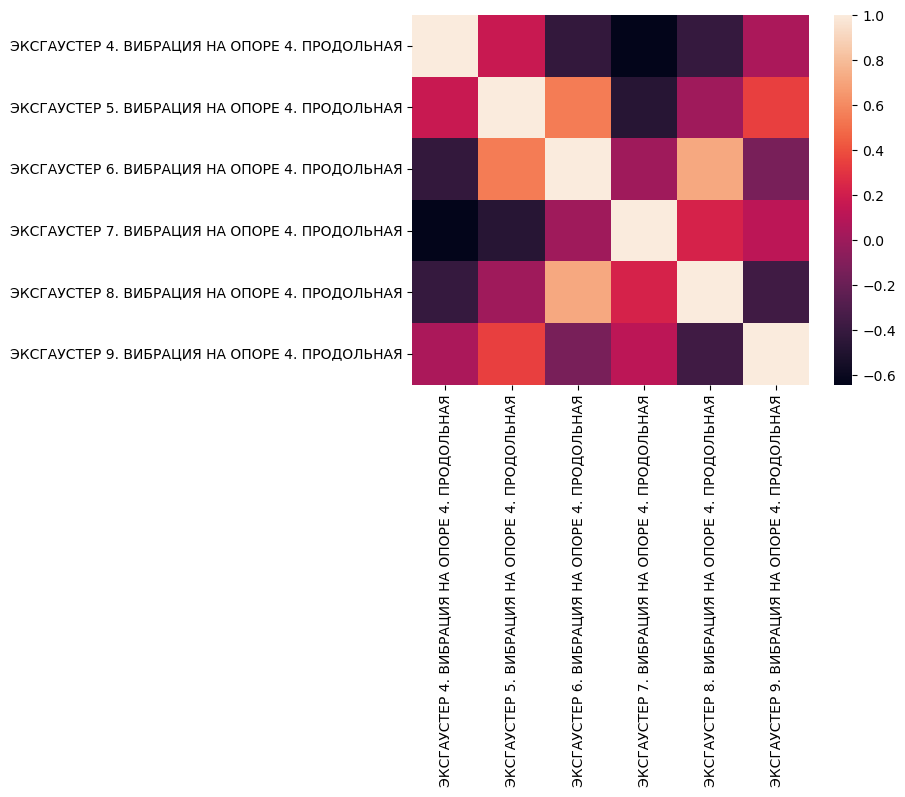

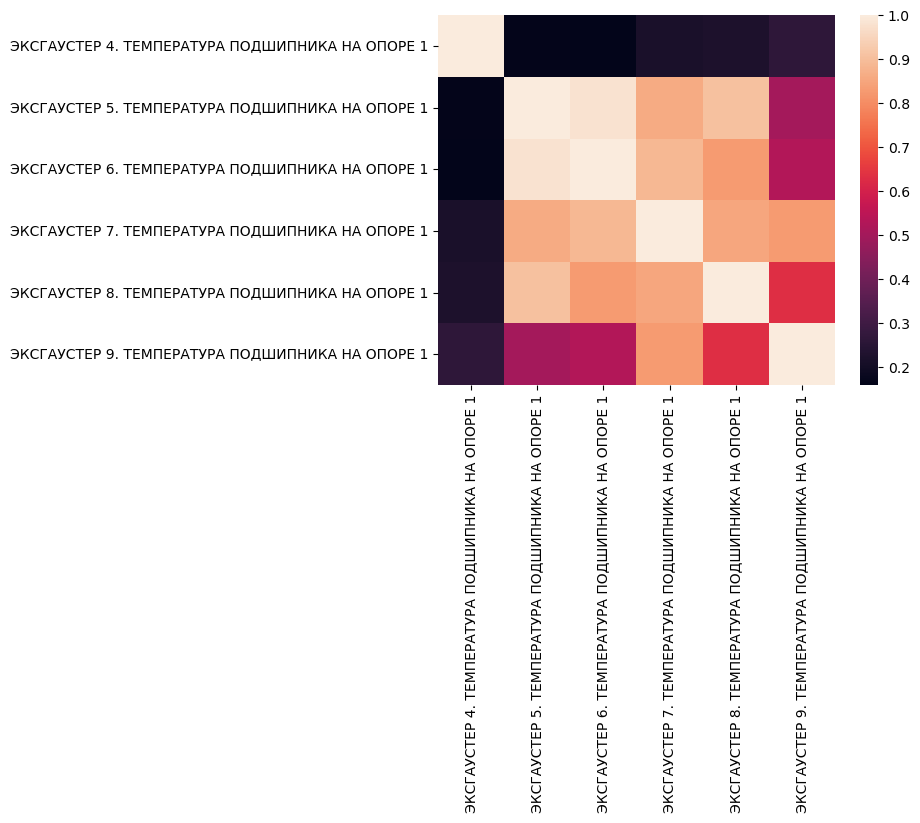

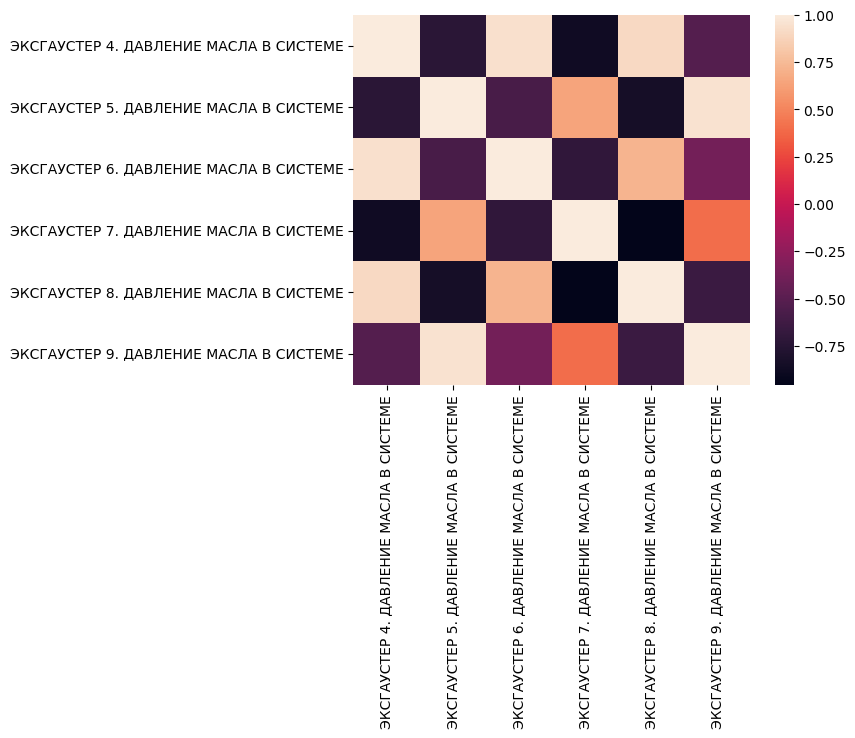

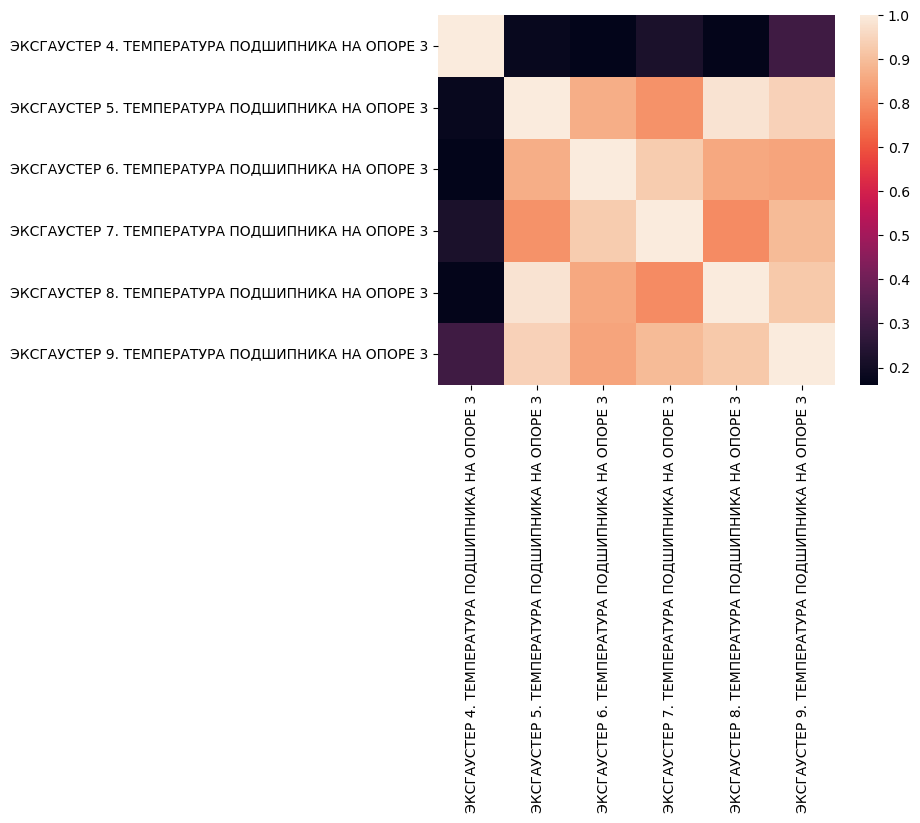

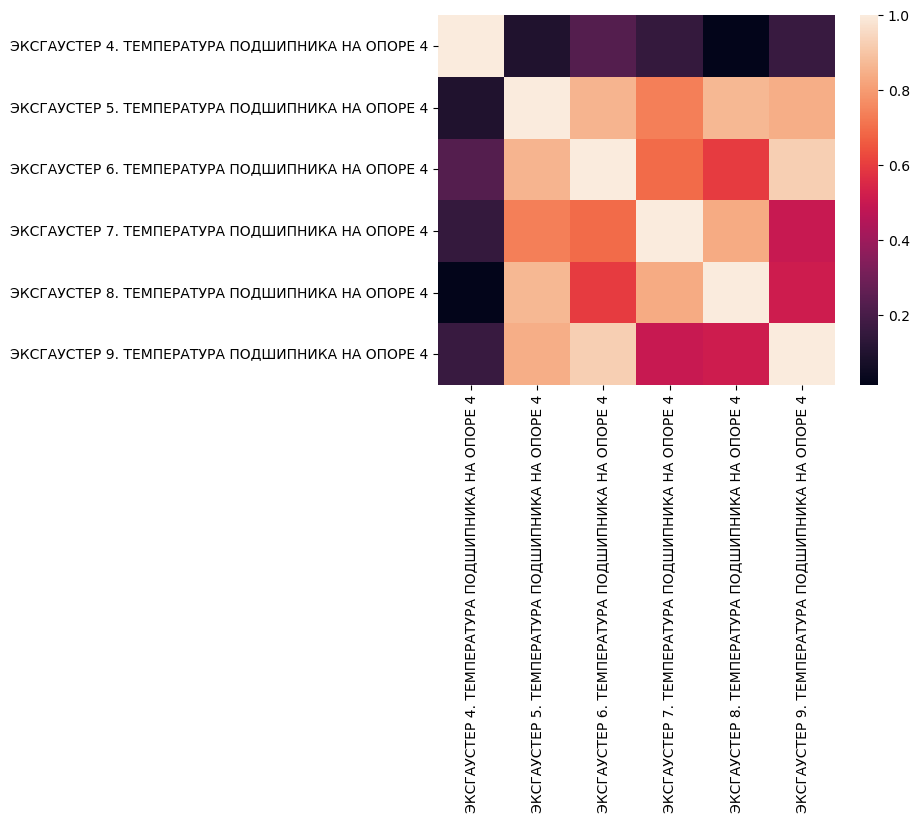

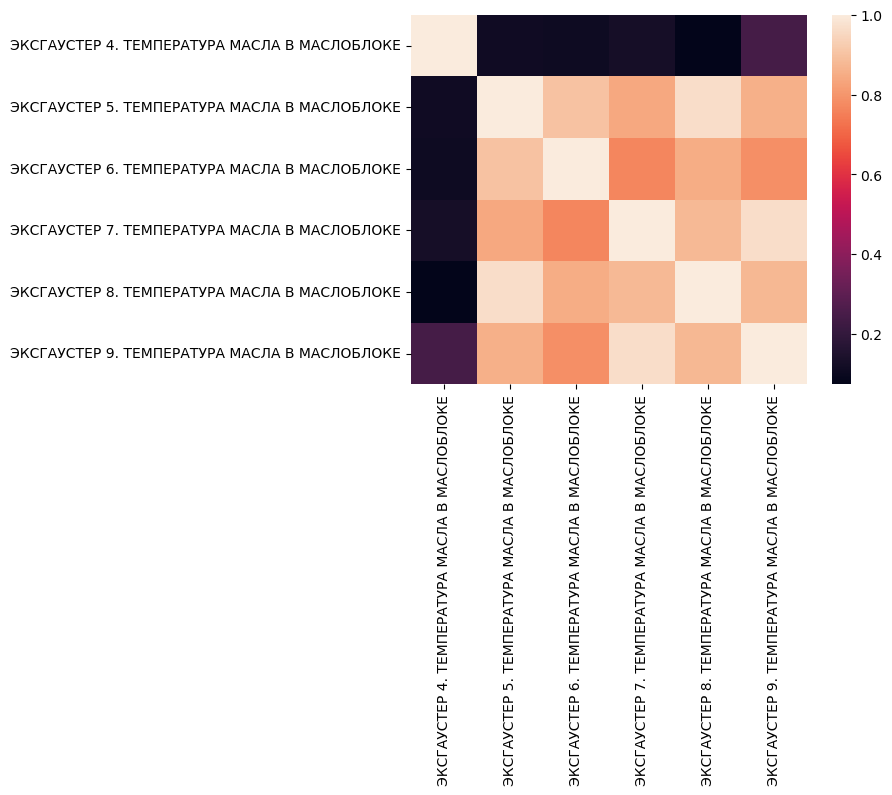

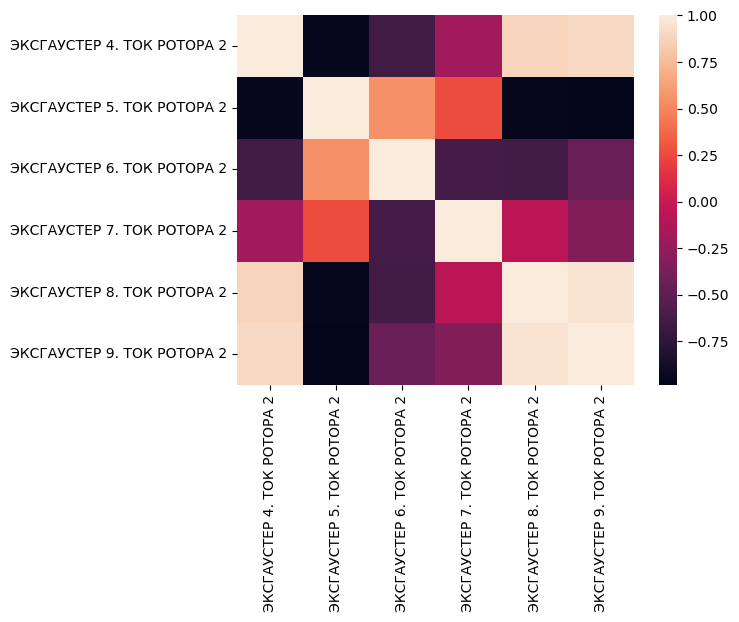

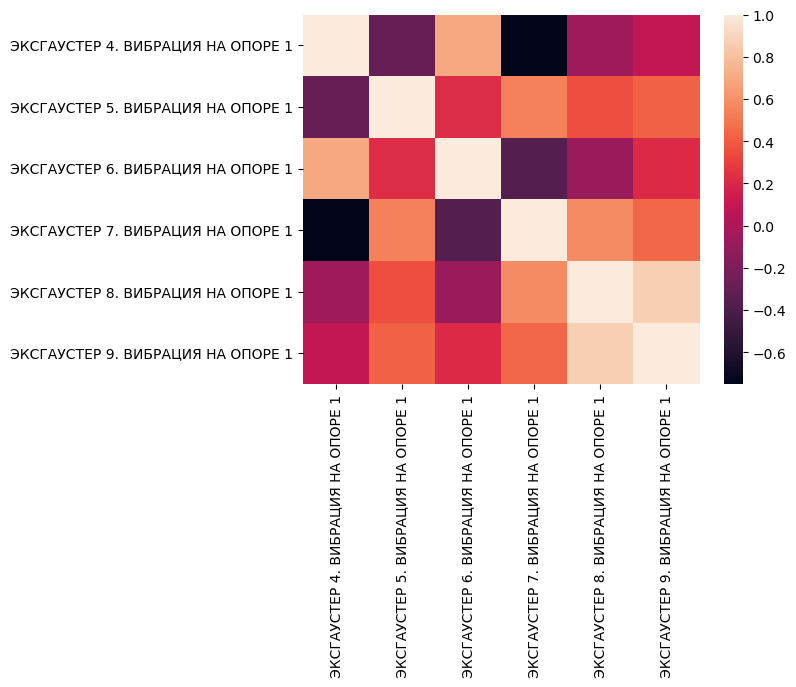

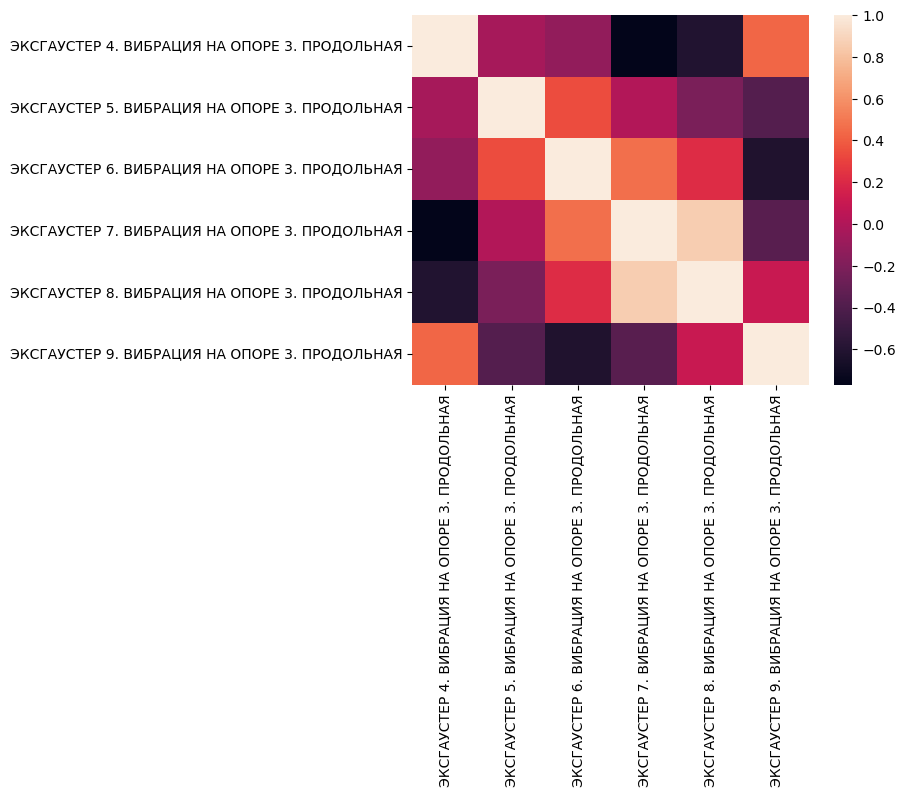

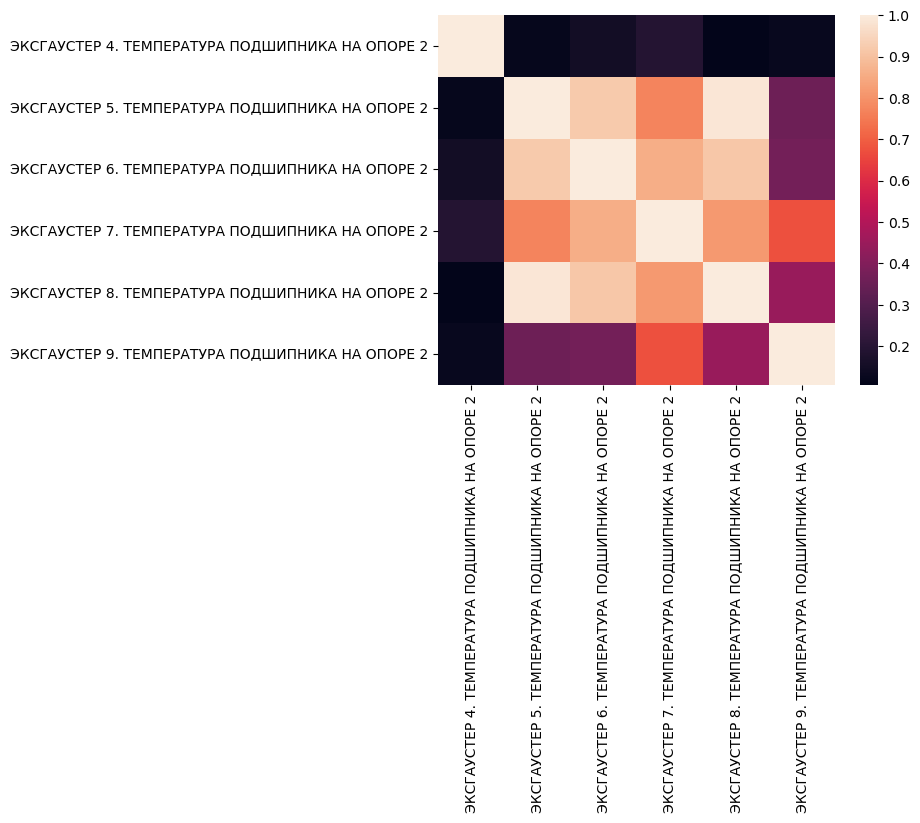

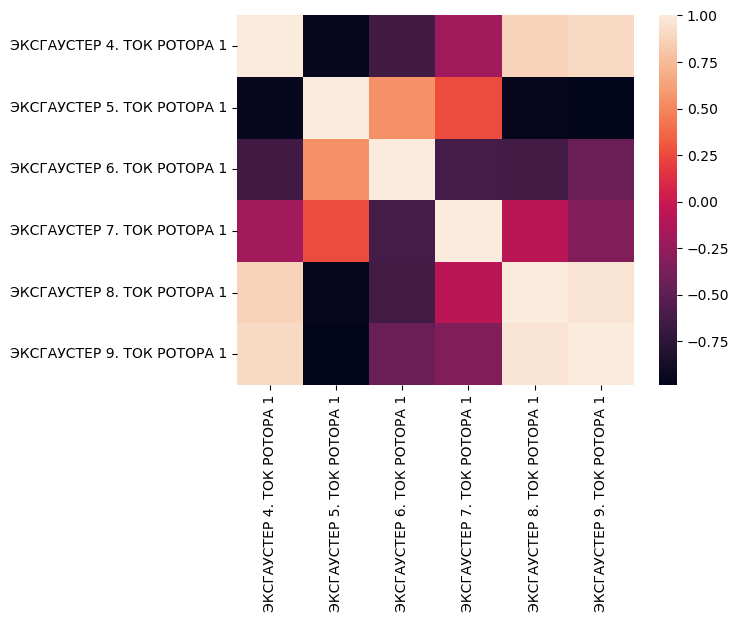

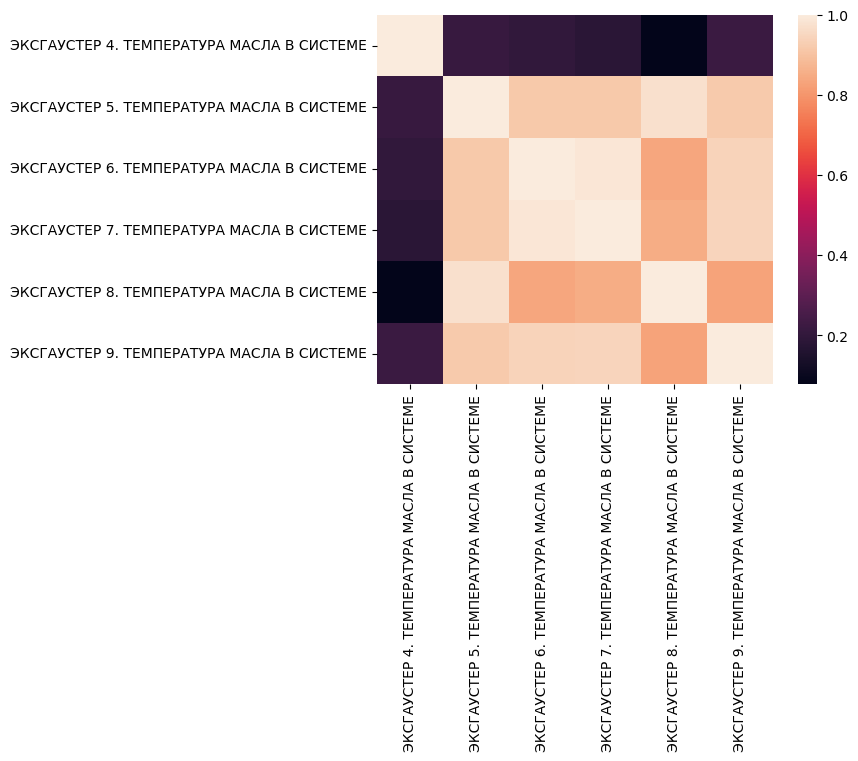

In [7]:
for line in matrix.index.values:
    local_columns = []
    for col in matrix.columns:
        local_columns.append(col+". "+line)
    #X_train[local_columns].plot()
    #plt.show()
    X_test[local_columns].to_csv(line+".csv")
    sns.heatmap(X_test[local_columns].corr())
    plt.show()

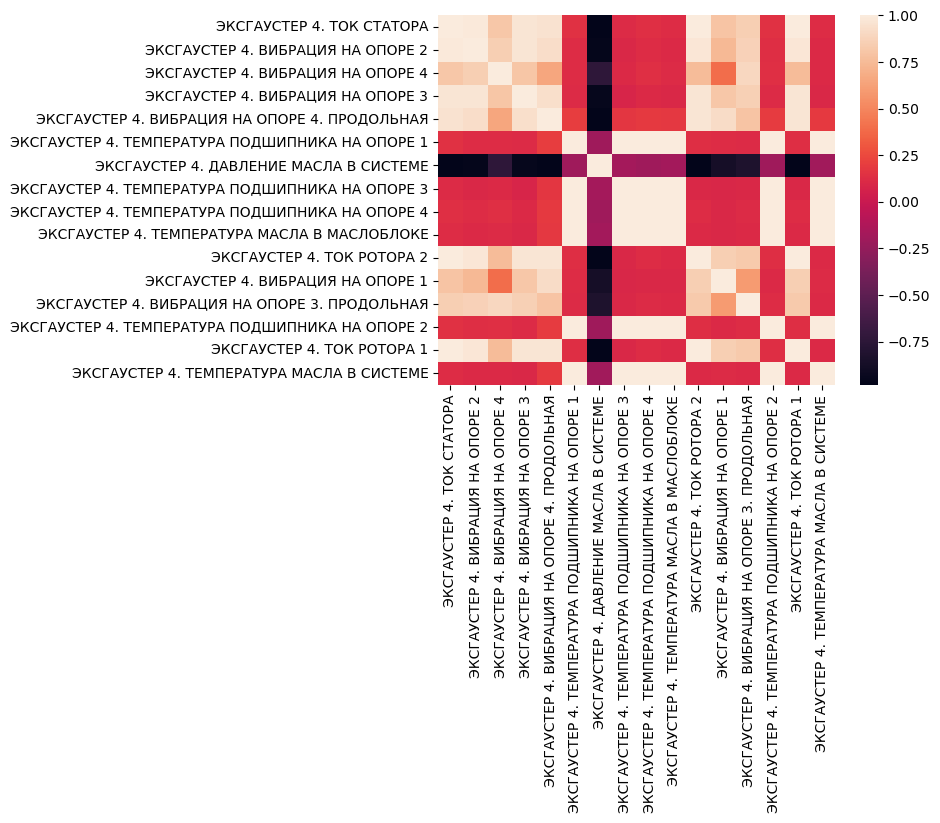

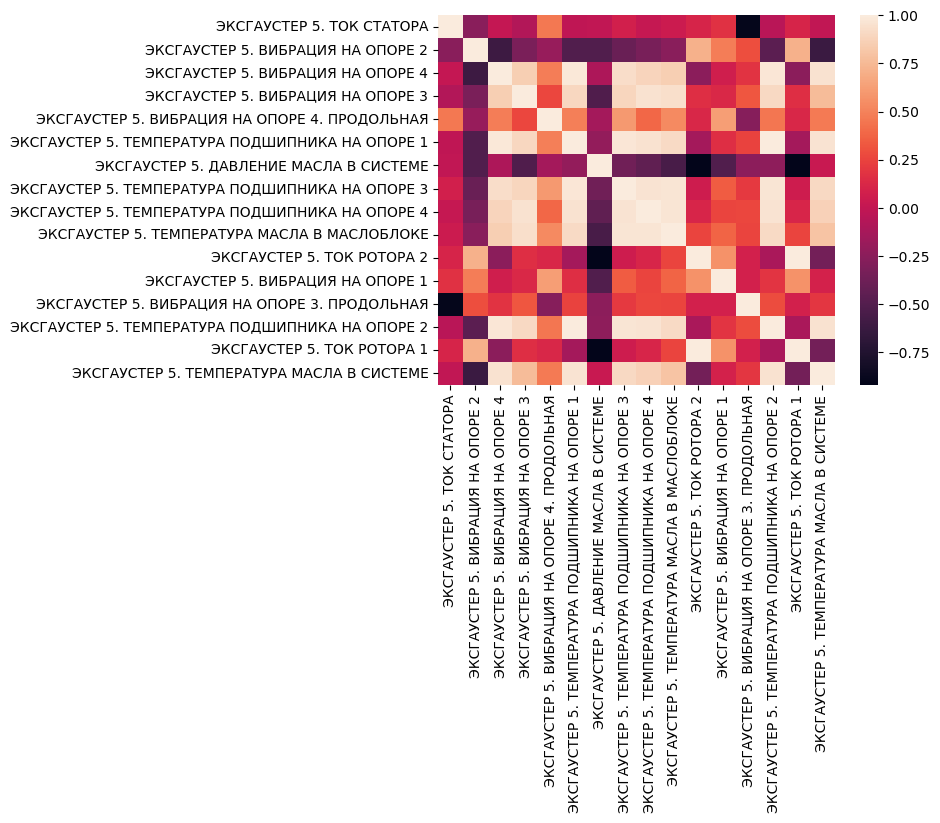

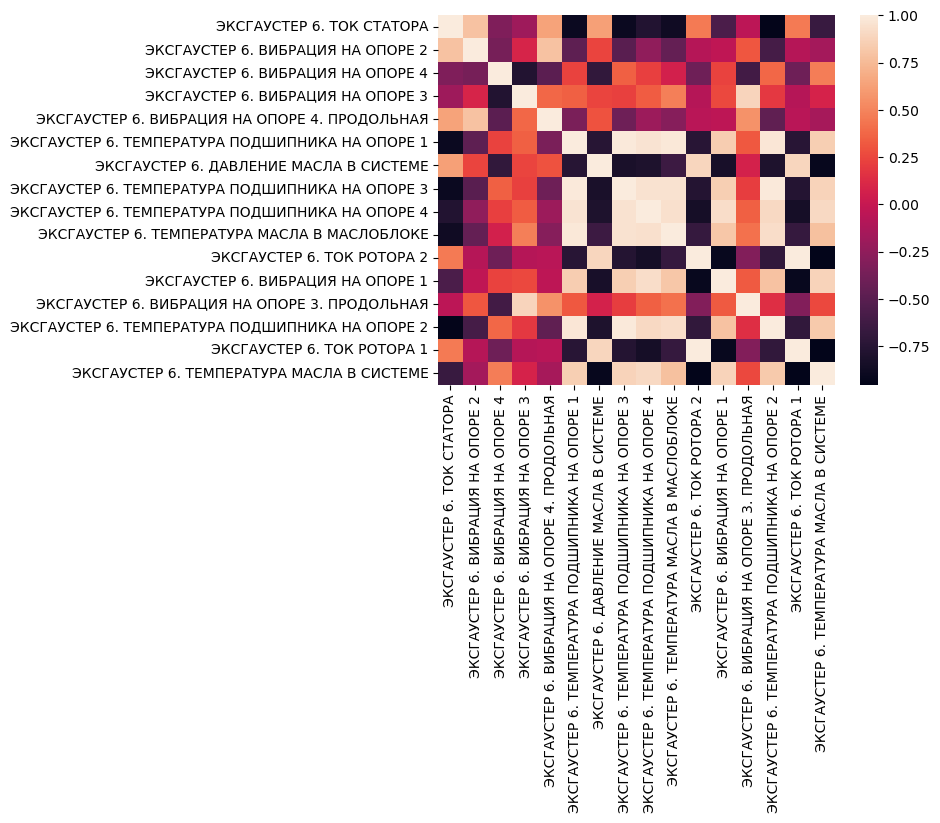

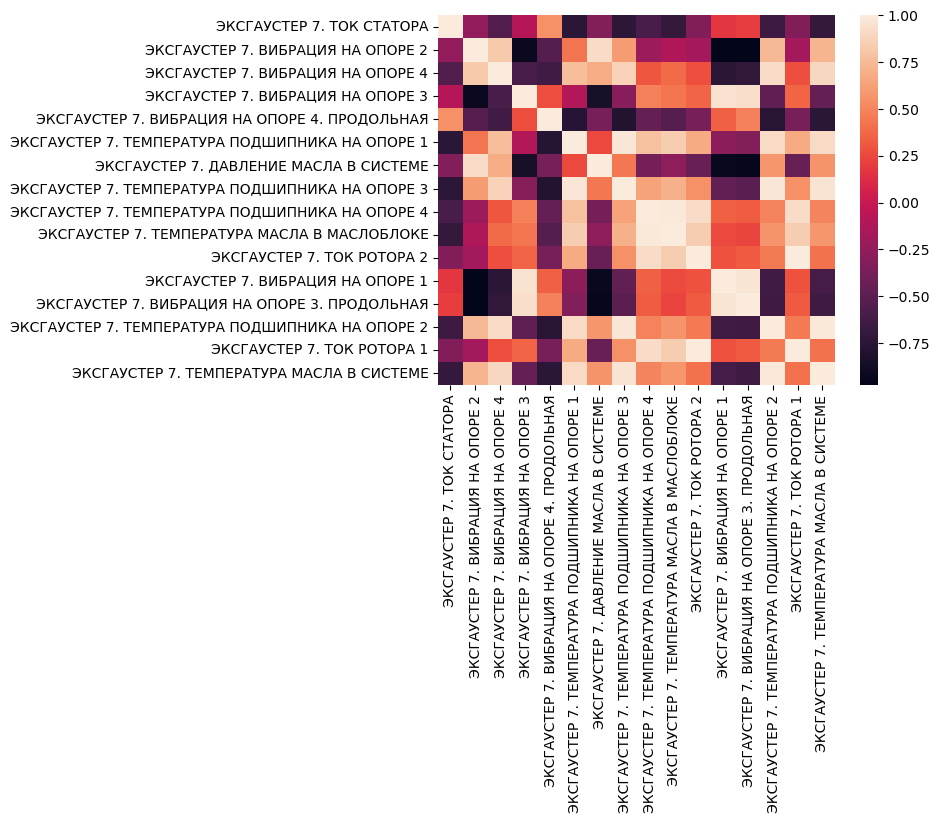

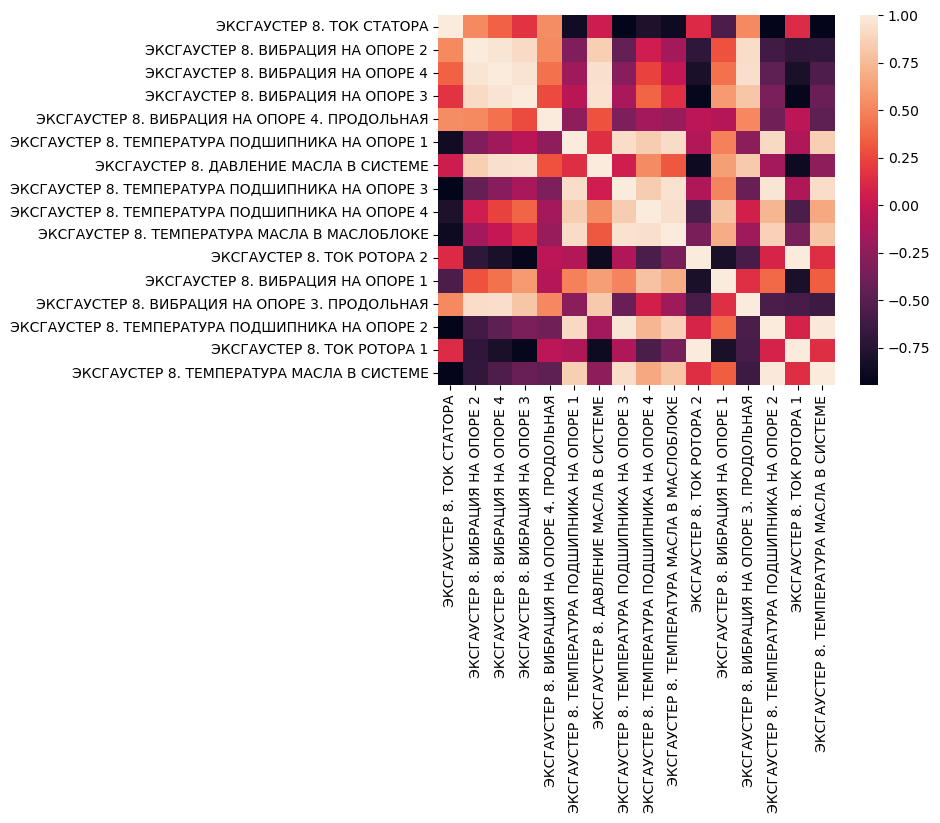

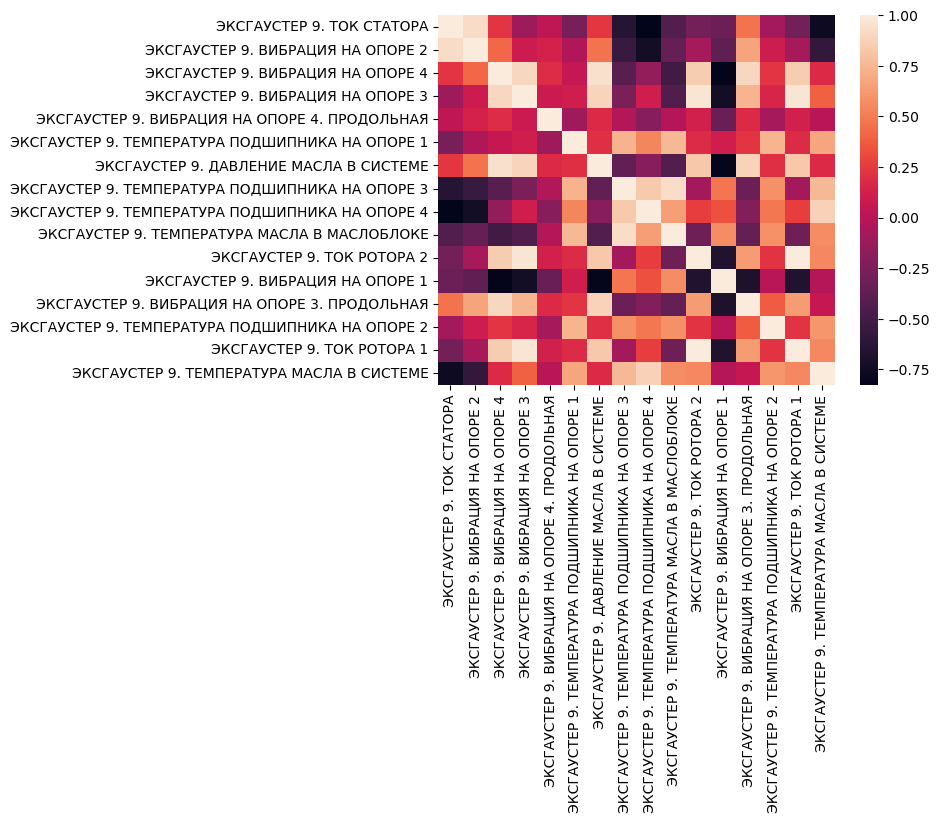

In [8]:
for col in matrix.columns:
    local_columns = []
    for line in matrix.index.values:
        local_columns.append(col+". "+line)
    #X_train[local_columns].plot()
    #plt.show()
    X_test[local_columns].to_csv(col+".csv")
    sns.heatmap(X_test[local_columns].corr())
    plt.show()

ЭКСГАУСТЕР 4. ТОК РОТОРА 1
[<class 'float'>]
ЭКСГАУСТЕР 4. ТОК РОТОРА 2
[<class 'float'>]
ЭКСГАУСТЕР 4. ТОК СТАТОРА
[<class 'float'>]
ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ
[<class 'float'>]
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1
[<class 'float'>]
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2
[<class 'float'>]
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3
[<class 'float'>]
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4
[<class 'float'>]
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ
[<class 'float'>]
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ
[<class 'float'>]
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 1
[<class 'float'>]
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 2
[<class 'float'>]
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3
[<class 'float'>]
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ
[<class 'float'>]
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4
[<class 'float'>]
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ
[<class 'float'>]
ЭКСГАУСТЕР 5. ТОК РОТОРА 1
[<class 'float'>]
ЭКСГАУСТЕР 5. ТОК РОТОРА 2
[<class 'float

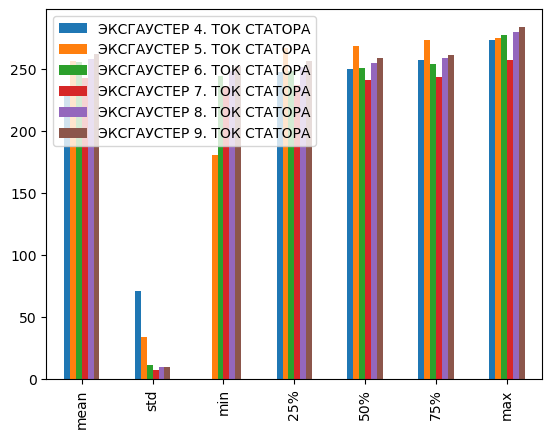

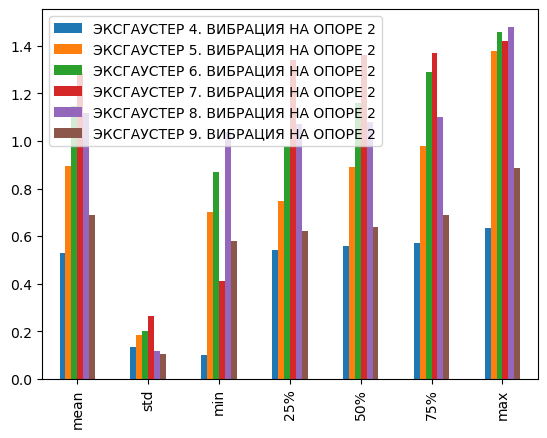

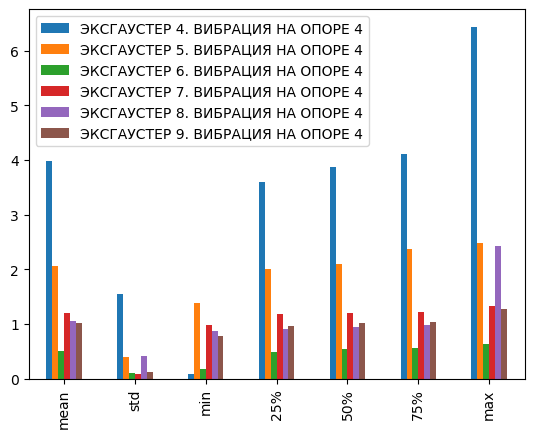

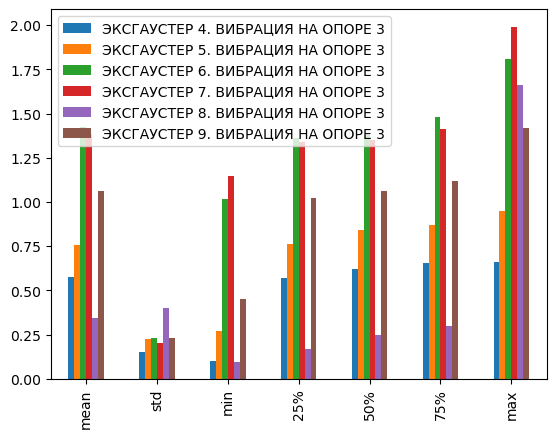

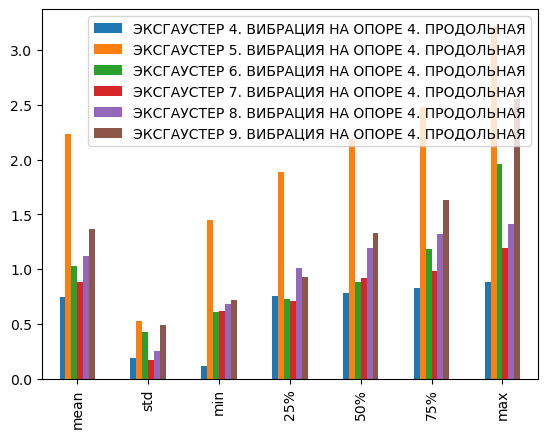

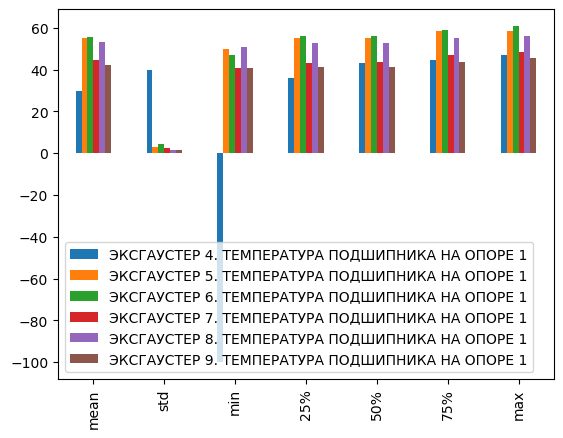

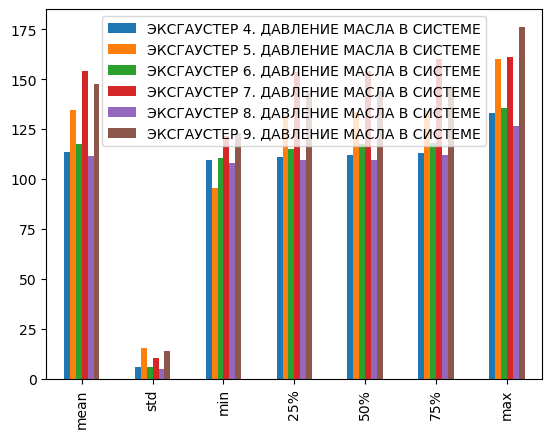

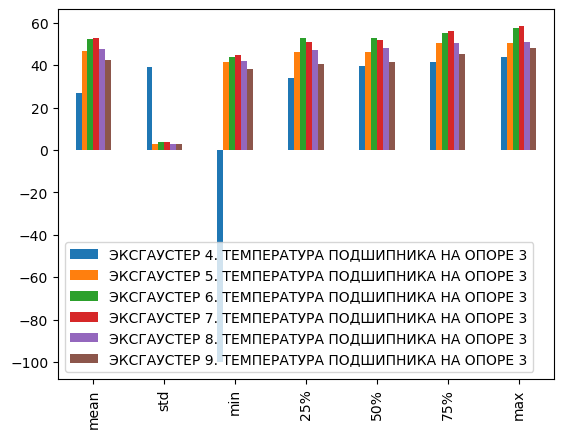

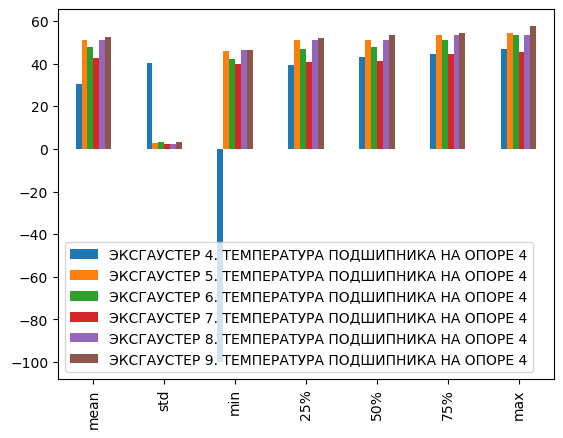

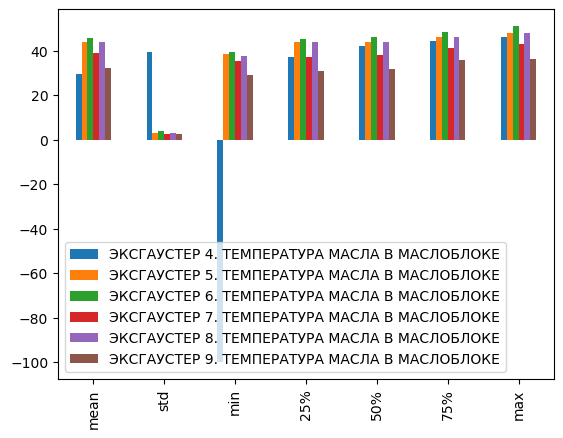

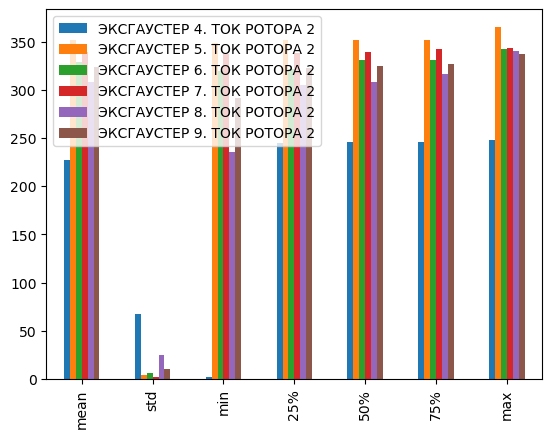

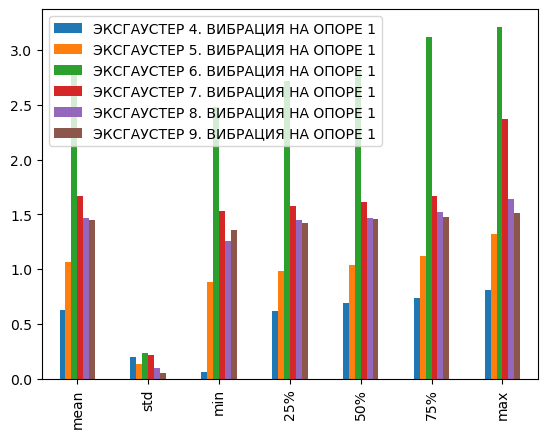

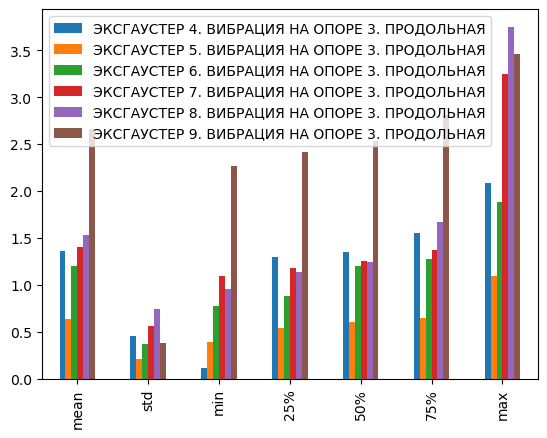

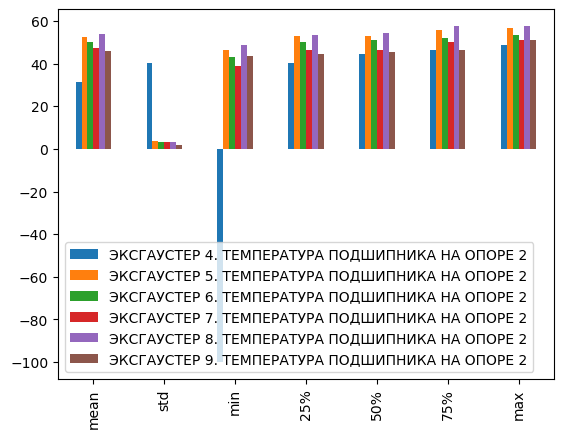

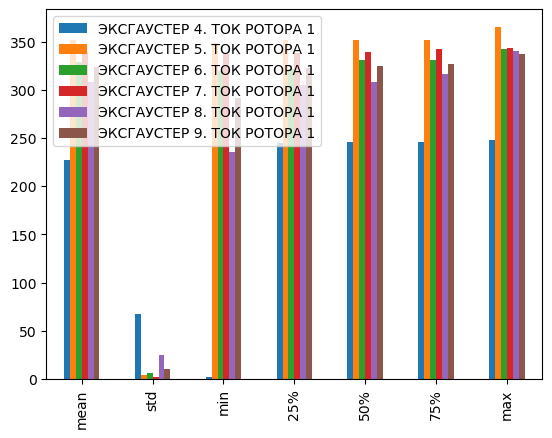

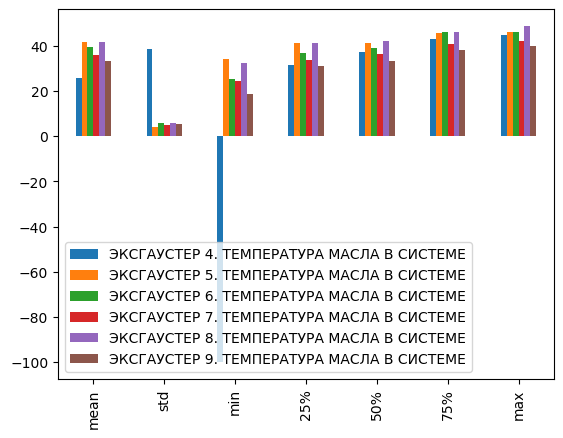

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
new_df = pd.DataFrame()
for col in X_test.columns:
    print(col)
    print(X_test[col].apply(type).unique())
    new_df = pd.concat([new_df, X_test[col].describe()],axis=1)
new_df = new_df.iloc[1:]
for line in matrix.index.values:
    local_columns = []
    for col in matrix.columns:
        local_columns.append(col+". "+line)
    new_df[local_columns].plot.bar()
    plt.show()

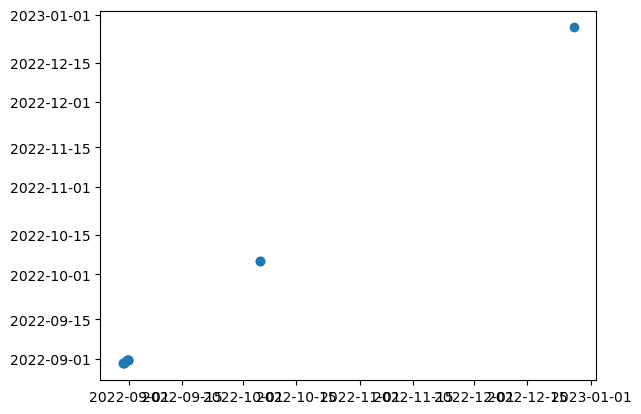

In [10]:
plt.scatter(X_test.index.values, X_test.index.values)
plt.show()